In [29]:
!pip install tensorflow

In [49]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold

In [36]:
mnist_ds = keras.datasets.mnist

# Load dataset  
(X_train_full, Y_train_full), (X_test, Y_test) = mnist_ds.load_data()

# Check shape of inputs
X_train_full.shape

(60000, 28, 28)

In [37]:
# min-max normalization
min_max_scaler = preprocessing.MinMaxScaler()
X_train_normalized = []
X_test_normalized = []
for image_idx, image in enumerate(X_train_full):
  X_train_normalized.append(min_max_scaler.fit_transform(image))
for image_idx, image in enumerate(X_test):
  X_test_normalized.append(min_max_scaler.fit_transform(image))

# convert to arrays
X_train_full = np.array(X_train_normalized)
X_test = np.array(X_test_normalized)

In [51]:

seed = 7
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

In [61]:
checkpoint_cb = keras.callbacks.ModelCheckpoint (".\my_keras.model.h5" , save_best_only=True)
earlystopping_cb = keras.callbacks.EarlyStopping (patience=10, restore_best_weights=True)
cvscores = []
for train, test in kfold.split(X_train_full, Y_train_full):
    # create layers input, hidden and output respectively and create the model
    input1 = keras.layers.Flatten(input_shape=[28,28])
    hidden1 = keras.layers.Dense(100, activation='relu', name="Hidden1")
    output = keras.layers.Dense(10, activation='softmax', name="Output" )

    model1 = keras.models.Sequential([input1, hidden1, output])

    # compile the model with the loss, optimizer and metrics
    model1.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    model1.fit(X_train_full[train], Y_train_full[train],epochs=20, batch_size=32, validation_data=(X_train_full[test], Y_train_full[test]), verbose=0, callbacks=[earlystopping_cb, checkpoint_cb])
    
    scores = model1.evaluate(X_train_full[test], Y_train_full[test], verbose=0)
    print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)


accuracy: 96.33%
accuracy: 96.12%
accuracy: 96.13%
accuracy: 96.32%
accuracy: 95.95%
accuracy: 96.02%
accuracy: 96.43%
accuracy: 95.98%
accuracy: 96.10%
accuracy: 95.78%


In [55]:
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

96.12% (+/- 0.19%)


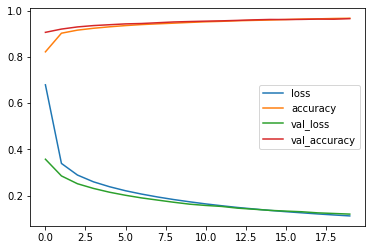

In [25]:
# use model metrics and plot to check the trends for loss, accuracy, validation loss and validation accuracy.
df = pd.DataFrame(hist1.history)
plt.plot(df)
plt.legend(df.columns)

# create layers input, hidden and output respectively and create the model
input1 = keras.layers.Flatten(input_shape=[28,28])
hidden1 = keras.layers.Dense(200, activation='relu', name="Hidden1")
hidden2 = keras.layers.Dense(200, activation='relu', name="Hidden2")
output = keras.layers.Dense(10, activation='softmax', name="Output" )

model1 = keras.models.Sequential([input1, hidden1, hidden2, output])

# compile the model with the loss, optimizer and metrics
model1.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# check model summary
model1.summary()



In [83]:
cvscores = []
for train, test in kfold.split(X_train_full, Y_train_full):
    # create layers input, hidden and output respectively and create the model
    input1 = keras.layers.Flatten(input_shape=[28,28])
    hidden1 = keras.layers.Dense(200, activation='relu', name="Hidden1")
    hidden2 = keras.layers.Dense(200, activation='relu', name="Hidden2")
    output = keras.layers.Dense(10, activation='softmax', name="Output" )

    model1 = keras.models.Sequential([input1, hidden1, hidden2, output])

    # compile the model with the loss, optimizer and metrics
    model1.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    model1.fit(X_train_full[train], Y_train_full[train],epochs=50, batch_size=15, validation_data=(X_train_full[test], Y_train_full[test]), verbose=2, callbacks=[earlystopping_cb, checkpoint_cb])
    
    scores = model1.evaluate(X_train_full[test], Y_train_full[test], verbose=0)
    print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/50
3600/3600 - 6s - loss: 0.2035 - accuracy: 0.9379 - val_loss: 0.1133 - val_accuracy: 0.9650
Epoch 2/50
3600/3600 - 5s - loss: 0.0907 - accuracy: 0.9722 - val_loss: 0.0871 - val_accuracy: 0.9747
Epoch 3/50
3600/3600 - 6s - loss: 0.0638 - accuracy: 0.9801 - val_loss: 0.0773 - val_accuracy: 0.9765
Epoch 4/50
3600/3600 - 6s - loss: 0.0504 - accuracy: 0.9841 - val_loss: 0.0893 - val_accuracy: 0.9748
Epoch 5/50
3600/3600 - 5s - loss: 0.0385 - accuracy: 0.9880 - val_loss: 0.0945 - val_accuracy: 0.9735
Epoch 6/50
3600/3600 - 5s - loss: 0.0323 - accuracy: 0.9894 - val_loss: 0.0837 - val_accuracy: 0.9775
Epoch 7/50
3600/3600 - 7s - loss: 0.0285 - accuracy: 0.9907 - val_loss: 0.1029 - val_accuracy: 0.9765
Epoch 8/50
3600/3600 - 6s - loss: 0.0250 - accuracy: 0.9920 - val_loss: 0.1016 - val_accuracy: 0.9782
Epoch 9/50
3600/3600 - 5s - loss: 0.0231 - accuracy: 0.9930 - val_loss: 0.1054 - val_accuracy: 0.9802
Epoch 10/50
3600/3600 - 5s - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.1269 - 

KeyboardInterrupt: 